<a href="https://colab.research.google.com/github/Randhir123/iisc-cds/blob/main/Randhir_M3_NB_MiniProject_01_MLR_MPI_OpenMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Implementation of Multiple Linear Regression using MPI and OpenMP

## Learning Objectives

At the end of the mini-project, you will be able to :

* understand the collective communication operations like scatter, gather, broadcast
* understand the blocking and non-blocking communication
* implement multiple linear regression and run it using MPI
* implement the multiple linear regression based predictions using OpenMP

### Dataset

The dataset chosen for this mini-project is [Combined Cycle Power Plant](https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant). The dataset is made up of 9568 records and 5 columns. Each record contains the values for Ambient Temperature, Exhaust Vaccum, Ambient Pressure, Relative Humidity and Energy Output.

Predicting full load electrical power output of a base load power plant is important in order to maximize the profit from the available megawatt hours.  The base load operation of a power plant is influenced by four main parameters, which are used as input variables in the dataset, such as ambient temperature, atmospheric pressure, relative humidity, and exhaust steam pressure. These parameters affect electrical power output, which is considered as the target variable.

**Note:** The data was collected over a six year period (2006-11).

## Information

#### MPI in a Nutshell

MPI stands for "Message Passing Interface". It is a library of functions (in C / Python) or subroutines (in Fortran) that you insert into source code to perform data communication between processes. MPI was developed over two years of discussions led by the MPI Forum, a group of roughly sixty people representing some forty organizations.

To know more about MPI click [here](https://hpc-tutorials.llnl.gov/mpi/)


#### Multiple Linear Regression

Multiple regression is an extension of simple linear regression. It is used when we want to predict the value of a variable based on the value of two or more other variables. The variable we want to predict is called the dependent variable (or sometimes, the outcome, target or criterion variable). The variables we are using to predict the value of the dependent variable are called the independent variables (or sometimes, the predictor, explanatory or regressor variables).

**Note:** We will be using the mpi4py Python package for MPI based code implementation

## Grading = 20 Points

**Run the below code to install mpi4py package**

In [ ]:
!pip install mpi4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.6-cp310-cp310-linux_x86_64.whl size=2746315 sha256=30981de63fc75dbbd3f3b2326fb9a4786a0016ba930f7873291648d31dcb6e1f
  Stored in directory: /root/.cache/pip/wheels/4c/ca/89/8fc1fb1c620afca13bb41c630b1f948bbf446e0aaa4b762e10
Successfully built mpi4py


#### Importing Necessary Packages

In [ ]:
# Importing pandas
import pandas as pd
# Importing Numpy
import numpy as np
# Importing MPI from mpi4py package
from mpi4py import MPI
# Importing sqrt function from the Math
from math import sqrt
# Importing Decimal, ROUND_HALF_UP functions from the decimal package
from decimal import Decimal, ROUND_HALF_UP
import time

#### Downloading the data

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/PowerPlantData.csv

### Overview

* Load the data and perform data pre-processing
* Identify the features, target and split the data into train and test
* Implement multiple Linear Regression by estimating the coefficients on the given data
* Use MPI package to distribute the data and implement `communicator`
* Define functions for each objective and make a script (.py) file to execute using MPI command
* Use OpenMP component to predict the data and calculate the error on the predicted data
* Implement the Linear Regression from `sklearn` and compare the results

#### Exercise 1: Load data (1 point)

Write a function that takes the filename as input and loads the data in a pandas dataframe with the column names as Ambient Temperature, Exhaust Vaccum, Ambient Pressure, Relative Humidity and Energy Output respectively.

**Hint:** read_csv()


In [ ]:
FILENAME = "/content/PowerPlantData.csv" # File path

# Define a function to load the data
def load_data(filename):
  """
  Load the Pandas dataframe from CSV
  """
  return pd.read_csv(FILENAME)

df = load_data(FILENAME)

#### Exercise 2: Explore data (1 point)

Write a function that takes the data loaded using the above defined function as input and explore it.

**Hint:** You can define and check for following things in the dataset inside a function

- checking for the number of rows and columns
- summary of the dataset
- check for the null values
- check for the duplicate values

In [ ]:
df.shape

(9568, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
print("Null Values =", df.isnull().values.any())

Null Values = False


In [ ]:
df.duplicated().sum()

41

In [ ]:
df = df.drop_duplicates()
df.shape

(9527, 5)

#### Exercise 3: Handle missing data (1 point)

After exploring the dataset if there are any null values present in the dataset then define a function that takes data loaded using the above defined function as input and handle the null values accordingly.

**Hint:**

- Drop the records containing the null values - dropna()
- Replace the null values with the mean/median/mode - fillna()

In [ ]:
# Function to handle missing data

def handle_missing_data(df, strategy='mean'):
    """
    Handle missing data in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame with missing values.
    strategy (str): Imputation strategy. Options: 'mean', 'median', 'mode', or a specific value.

    Returns:
    DataFrame: DataFrame with missing values handled according to the specified strategy.
    """
    if strategy == 'drop':
        return df.dropna()
    elif strategy == 'mean':
        return df.fillna(df.mean())
    elif strategy == 'median':
        return df.fillna(df.median())
    elif strategy == 'mode':
        return df.fillna(df.mode().iloc[0])
    else:
        return df.fillna(strategy)

df = handle_missing_data(df)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


#### Exercise 4: Scale the data (1 point)

Write a function that takes the data after handling the missing data as input and returns the standardized data.

**Hint:**

- standardization of the data  can be performed using the below formula

$ (x - mean(x)) / std(x) $

In [ ]:
# Defining a function to standardize the data

def standardize_data(df):
    """
    Standardize the input DataFrame by scaling each feature to have mean 0 and variance 1.

    Parameters:
    df (DataFrame): Input DataFrame with missing values handled.

    Returns:
    DataFrame: DataFrame with standardized data.
    """
    # Calculate the mean and standard deviation of each feature
    means = df.mean()
    stds = df.std()

    # Standardize each feature using the formula
    df_standardized = (df - means) / stds

    return df_standardized

df_scaled = standardize_data(df)
df_scaled.head()

,AT,V,AP,RH,PE
0,-1.520368,-1.065985,-0.403514,1.141539,1.534360
1,0.534869,0.330796,-0.309246,0.059219,-0.503895
2,1.354277,0.205464,-1.024671,-2.151287,-0.914129
3,-0.079016,-0.362865,-1.012887,0.236525,-0.073121
4,-1.055589,-1.074656,0.655315,1.633752,0.592408


#### Exercise 5: Feature selection (1 point)

Write a function that takes scaled data as input and returns the features and target variable values

**Hint:**

- Features: AmbientTemperature, ExhaustVaccum, AmbientPressure, RelativeHumidity
- Target Variable: EnergyOutput

In [ ]:
# Define a function

def get_features_target(df):
  """
  Returns the features and target variable values as dataframe
  """
  X = df.drop(["PE"], axis=1)
  y = df["PE"]
  return X, y

X, y = get_features_target(df_scaled)

#### Exercise 6: Correlation (1 point)

Calculate correlation between the variables

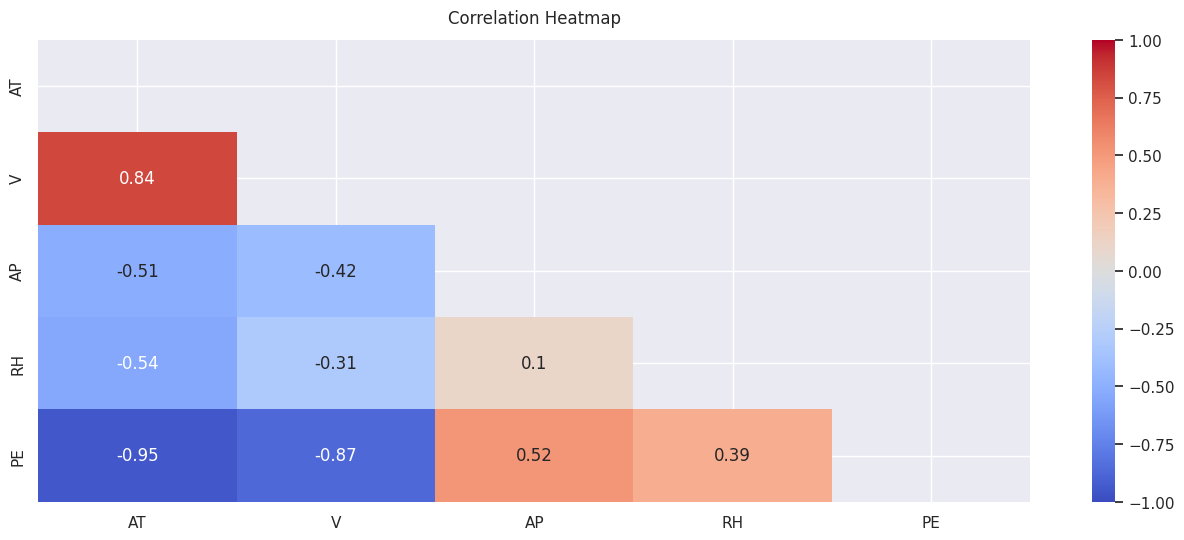

In [ ]:
# correlation
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(df_scaled.corr()))
heatmap = sns.heatmap(df_scaled.corr(), mask=mask, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### Exercise 7: Estimate the coefficients (2 points)

Write a function that takes features and target as input and returns the estimated coefficient values

**Hint:**

- Calculate the estimated coefficients using the below formula

$ β = (X^T X)^{-1} X^T y $

- transpose(), np.linalg.inv()

In [ ]:
# Calculating the coeffients

def estimate_coefficients(features, target):
    """
    Estimate the coefficient values using ordinary least squares (OLS) method.

    Parameters:
    features (DataFrame): DataFrame containing the features.
    target (Series): Series containing the target variable values.

    Returns:
    ndarray: Estimated coefficient values.
    """
    # Add a column of ones to the features matrix for the intercept term
    X = np.column_stack((np.ones(len(features)), features))

    # Calculate the coefficient values using OLS method: β = (X^T X)^(-1) X^T y
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ target

    return coefficients

beta = estimate_coefficients(X, y)
beta

array([ 1.01818781e-15, -8.62253527e-01, -1.75756665e-01,  2.11120293e-02,
       -1.34864461e-01])

#### Exercise 8: Fit the data to estimate the coefficients (2 points)

Write a function named fit which takes features and targets as input and returns the intercept and coefficient values.

**Hint:**

- create a dummy column in the features dataframe which is made up of all ones
- convert the features dataframe into numpy array
- call the estimated coefficients function which is defined above
- np.ones(), np.concatenate()

In [ ]:
# defining a fit function
def fit(x, y):
    return estimate_coefficients(x, y)

#### Exercise 9: Predict the data on estimated coefficients (1 point)

Write a function named predict which takes features, intercept and coefficient values as input and returns the predicted values.

**Hint:**

- Fit the intercept, coefficients values in the below equation

  $y = b_0 + b_1*x + ... + b_i*x_i$

In [ ]:
 # fucntion to predict the values
def predict(x, intercept, coefficients):
    '''
    y = b_0 + b_1*x + ... + b_i*x_i
    '''
    predictions = np.dot(x, coefficients) + intercept
    return predictions

#### Exercise 10: Root mean squared error (1 point)

Write a function to calculate the RMSE error.

**Hint:**

- [How to calculate the RSME error](https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e)

In [ ]:
# Define a function to calculate the error

def calculate_rmse(actual_values, predicted_values):
    """
    Calculate the Root Mean Squared Error (RMSE) between actual and predicted values.

    Parameters:
    actual_values (ndarray): Array containing the actual target variable values.
    predicted_values (ndarray): Array containing the predicted target variable values.

    Returns:
    float: RMSE value.
    """
    # Calculate the squared differences between actual and predicted values
    squared_errors = (actual_values - predicted_values) ** 2

    # Calculate the mean of squared errors
    mean_squared_error = np.mean(squared_errors)

    # Calculate the square root of mean squared error to get RMSE
    rmse = np.sqrt(mean_squared_error)

    return rmse

#### Exercise 11: Split the data into train and test (1 point)

Write a function named train_test_split which takes features and targets as input and returns the train and test sets respectively.

**Hint:**

- Shuffle the data
- Consider 70 % of data as a train set and the rest of the data as a test set

In [ ]:
from sklearn.model_selection import train_test_split

def train_test_split_custom(features, targets, test_size=0.3, random_state=None):
    """
    Split the features and targets into training and testing sets.

    Parameters:
    features (ndarray or DataFrame): Array or DataFrame containing the features.
    targets (ndarray or Series): Array or Series containing the target variable.
    test_size (float or int, optional): Proportion of the dataset to include in the test split.
                                        Defaults to 0.3.
    random_state (int, RandomState instance or None, optional): Controls the random state for shuffling.
                                                               Defaults to None.

    Returns:
    tuple: Tuple containing (X_train, X_test, y_train, y_test).
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

#### Exercise 12: Implement predict using OpenMP (1 point)

Get the predictions for test data and calculate the test error(RMSE) by implementing the OpenMP (pymp)

**Hints:**

* Using the pymp.Parallel implement the predict function (use from above)

* Call the predict function by passing test data as an argument

* calculate the error (RMSE) by comparing the Actual test data and predicted test data

In [ ]:
!pip install pymp-pypi

  Preparing metadata (setup.py) ... done
  Created wheel for pymp-pypi: filename=pymp_pypi-0.5.0-py3-none-any.whl size=10318 sha256=f7360d26fa6c9da867df721a04d06171cc16c69491f117b16ab17a903175bf16
  Stored in directory: /root/.cache/pip/wheels/5e/db/4b/4c02f5b91b1abcde14433d1b336ac00a09761383e7bb1013cf
Successfully built pymp-pypi


In [ ]:
import pymp

def predict_parallel(features, intercept, coefficients):
    """
    Predict the target variable values using parallel processing.

    Parameters:
    features (ndarray): Array containing the features.
    intercept (float): Intercept value.
    coefficients (ndarray): Coefficient values.

    Returns:
    ndarray: Predicted target variable values.
    """
    # Initialize an empty list to store the predictions
    predictions = pymp.shared.array((features.shape[0],), dtype='float64')

    # Parallelize the prediction process
    with pymp.Parallel(4) as p:
        # Iterate over the features in parallel
        for i in p.range(len(features)):
            # Calculate the predicted value for each feature
            #p.print('Yay! {} done!'.format(i), p.thread_num)
            predictions[i] = predict(features.iloc[i], intercept, coefficients)

    return predictions

# Get the predictions for the test data using parallel processing
X_train, X_test, y_train, y_test = train_test_split_custom(X, y)
beta = fit(X_train, y_train)

predictions_test = predict_parallel(X_test, beta[0], beta[1:])

# Calculate the RMSE error
rmse_test = calculate_rmse(y_test, predictions_test)
print("Test RMSE:", rmse_test)


Test RMSE: 0.2630854037610109


#### Exercise 13: Create a communicator (1 point)

Create a comunicator and define the rank and size

In [ ]:
# creating the communicator
comm = MPI.COMM_WORLD
# number of the process running the code i.e rank
rank = comm.Get_rank()
# total number of processes running i.e size
size = comm.Get_size()
# Displaying the rank and size of a communicator
print("rank is {} and size is {}".format(rank,size))

rank is 0 and size is 1


#### Exercise 14: Divide the data into slices (1 point)

Write a function named dividing_data which takes train features set, train target set, and size of workers as inputs and returns the sliced data for each worker.

![img](https://cdn.iisc.talentsprint.com/CDS/Images/MiniProject_MPI_DataSlice.JPG)

For Example, if there are 4 processes, slice the data into 4 equal parts with 25% ratio

**Hint:**

- Divide the Data equally among the workers
  - Create an empty list
  - Iterate over the size of workers
  - Append each slice of data to the list

In [ ]:
def dividing_data(x_train, y_train, size_of_workers):
    # Size of the slice
    slice_for_each_worker = int(Decimal(x_train.shape[0]/size_of_workers).quantize(Decimal('1.'), rounding = ROUND_HALF_UP))
    print('Slice of data for each worker: {}'.format(slice_for_each_worker))
    # Initialize list to store sliced data
    sliced_data = []

    # Iterate over the number of workers
    for i in range(size_of_workers):
        start_index = i * slice_for_each_worker
        end_index = (i + 1) * slice_for_each_worker if i < size_of_workers - 1 else len(x_train)

        # Slice the data for this worker
        features_slice = x_train[start_index:end_index]
        target_slice = y_train[start_index:end_index]

        # Append sliced data to the list
        sliced_data.append((features_slice, target_slice))

    return sliced_data

dividing_data(X_train, y_train, size)

Slice of data for each worker: 6668


[(            AT         V        AP        RH
  8573 -1.087828 -1.183435 -0.331130  0.596614
  8489 -0.572004 -1.035244 -1.329358  0.471336
  8808  0.526809 -0.393607 -1.588594  0.087972
  4748 -1.564697 -1.090421  1.040803  0.192712
  2511  0.970095  1.518691 -1.411842  1.439331
  ...        ...       ...       ...       ...
  4531 -1.685593 -1.065985  1.542442  1.205890
  7535  0.863975  0.324490  0.067825 -0.599346
  1580 -1.466637 -1.418334  0.327061 -0.778021
  2735 -1.232904 -0.974548  0.662048  1.333221
  2564  0.967409  1.327934 -1.031404  0.224203
  
  [6668 rows x 4 columns],
  8573    1.371793
  8489    0.635251
  8808   -0.815532
  4748    1.237396
  2511   -1.391267
            ...   
  4531    1.245026
  7535   -0.908260
  1580   -0.921758
  2735    1.506777
  2564   -1.606067
  Name: PE, Length: 6668, dtype: float64)]

#### Exercise 15: Prepare the data in root worker to assign data for all the workers (1 point)

- When it is the root worker, perform the below operation:
    - Store the features and target values in separate variables
    - Split the data into train and test sets using the train_test_split function defined above
    - Divide the data among the workers using the dividing_data function above

In [ ]:
if rank == 0:  # Root worker
  # Split the data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split_custom(X, y)

  # Divide the data among the workers
  divided_data = dividing_data(X_train, y_train, size)

Slice of data for each worker: 6668


#### Exercise 16: Scatter and gather the data (1 point)

Perform the below operations:

- Send slices of the training set(the features data X and the expected target data Y) to every worker including the root worker
    - **Hint:** scatter()
    - use `barrier()` to block workers until all workers in the group reach a Barrier, to scatter from root worker.
- Every worker should get the predicted target Y(yhat) for each slice
- Get the new coefficient of each instance in a slice
    - **Hint:** fit function defined above
- Gather the new coefficient from each worker
    - **Hint:** gather()
    - Take the mean of the gathered coefficients
- Calculate the root mean square error for the test set

To know more about `scatter`, `gather` and `barrier` click [here](https://nyu-cds.github.io/python-mpi/05-collectives/)

In [ ]:
# Scatter the data to all workers
comm.barrier()
data_slice = comm.scatter(divided_data, root=0)

# Unpack data slice
X_train_slice = data_slice[0]
y_train_slice = data_slice[1]

# Fit model and get coefficients
coefficients = fit(X_train_slice, y_train_slice)

# Gather coefficients from all workers
all_coefficients = comm.gather(coefficients, root=0)

if rank == 0:  # Root worker
    # Calculate the mean of coefficients
    mean_coefficients = np.mean(all_coefficients, axis=0)

    # Predict target values for test set
    y_pred = predict(X_test, mean_coefficients[0], mean_coefficients[1:])

    # Calculate root mean square error
    rmse = calculate_rmse(y_test, y_pred)

    print("Root Mean Square Error:", rmse)

Root Mean Square Error: 0.2728871929404159


#### Exercise 17: Make a script and execute everything in one place (1 point)

Write a script(.py) file which contains the code of all the above exercises in it so that you can run the code on multiple processes using MPI.

**Hint:**

- magic commands
- put MPI related code under main function
- !mpirun --allow-run-as-root -np 4 python filename.py

In [ ]:
%%writefile miniproject1.py
from mpi4py import MPI
import pandas as pd
import numpy as np
from math import sqrt
from decimal import Decimal, ROUND_HALF_UP
from sklearn.model_selection import train_test_split

# fucntion to predict the values
def predict(x, intercept, coefficients):
    '''
    y = b_0 + b_1*x + ... + b_i*x_i
    '''
    predictions = np.dot(x, coefficients) + intercept
    return predictions

# Define a function to calculate the error
def calculate_rmse(actual_values, predicted_values):
    """
    Calculate the Root Mean Squared Error (RMSE) between actual and predicted values.

    Parameters:
    actual_values (ndarray): Array containing the actual target variable values.
    predicted_values (ndarray): Array containing the predicted target variable values.

    Returns:
    float: RMSE value.
    """
    # Calculate the squared differences between actual and predicted values
    squared_errors = (actual_values - predicted_values) ** 2

    # Calculate the mean of squared errors
    mean_squared_error = np.mean(squared_errors)

    # Calculate the square root of mean squared error to get RMSE
    rmse = np.sqrt(mean_squared_error)

    return rmse

# Divide the data into slices
def dividing_data(x_train, y_train, size_of_workers):
    # Size of the slice
    slice_for_each_worker = int(Decimal(x_train.shape[0]/size_of_workers).quantize(Decimal('1.'), rounding = ROUND_HALF_UP))
    print('Slice of data for each worker: {}'.format(slice_for_each_worker))
    # Initialize list to store sliced data
    sliced_data = []

    # Iterate over the number of workers
    for i in range(size_of_workers):
        start_index = i * slice_for_each_worker
        end_index = (i + 1) * slice_for_each_worker if i < size_of_workers - 1 else len(x_train)

        # Slice the data for this worker
        features_slice = x_train[start_index:end_index]
        target_slice = y_train[start_index:end_index]

        # Append sliced data to the list
        sliced_data.append((features_slice, target_slice))

    return sliced_data

# defining a fit function
def fit(x, y):
    return estimate_coefficients(x, y)

# Calculating the coeffients
def estimate_coefficients(features, target):
    """
    Estimate the coefficient values using ordinary least squares (OLS) method.

    Parameters:
    features (DataFrame): DataFrame containing the features.
    target (Series): Series containing the target variable values.

    Returns:
    ndarray: Estimated coefficient values.
    """
    # Add a column of ones to the features matrix for the intercept term
    X = np.column_stack((np.ones(len(features)), features))

    # Calculate the coefficient values using OLS method: β = (X^T X)^(-1) X^T y
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ target

    return coefficients


# Define a function to load the data
def load_data(filename):
	"""
	Load the Pandas dataframe from CSV
	"""
	return pd.read_csv(filename)

# Function to handle missing data
def handle_missing_data(df, strategy='mean'):
    """
    Handle missing data in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame with missing values.
    strategy (str): Imputation strategy. Options: 'mean', 'median', 'mode', or a specific value.

    Returns:
    DataFrame: DataFrame with missing values handled according to the specified strategy.
    """
    if strategy == 'drop':
        return df.dropna()
    elif strategy == 'mean':
        return df.fillna(df.mean())
    elif strategy == 'median':
        return df.fillna(df.median())
    elif strategy == 'mode':
        return df.fillna(df.mode().iloc[0])
    else:
        return df.fillna(strategy)

# Defining a function to standardize the data
def standardize_data(df):
    """
    Standardize the input DataFrame by scaling each feature to have mean 0 and variance 1.

    Parameters:
    df (DataFrame): Input DataFrame with missing values handled.

    Returns:
    DataFrame: DataFrame with standardized data.
    """
    # Calculate the mean and standard deviation of each feature
    means = df.mean()
    stds = df.std()

    # Standardize each feature using the formula
    df_standardized = (df - means) / stds

    return df_standardized

def get_features_target(df):
	"""
	Returns the features and target variable values as dataframe
	"""
	X = df.drop(["PE"], axis=1)
	y = df["PE"]
	return X, y


def train_test_split_custom(features, targets, test_size=0.3, random_state=None):
    """
    Split the features and targets into training and testing sets.

    Parameters:
    features (ndarray or DataFrame): Array or DataFrame containing the features.
    targets (ndarray or Series): Array or Series containing the target variable.
    test_size (float or int, optional): Proportion of the dataset to include in the test split.
                                        Defaults to 0.3.
    random_state (int, RandomState instance or None, optional): Controls the random state for shuffling.
                                                               Defaults to None.

    Returns:
    tuple: Tuple containing (X_train, X_test, y_train, y_test).
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, targets)

    return X_train, X_test, y_train, y_test

def main():
	# Initialize MPI
	# creating the communicator
	comm = MPI.COMM_WORLD
	# number of the process running the code i.e rank
	rank = comm.Get_rank()
	# total number of processes running i.e size
	size = comm.Get_size()
	# Displaying the rank and size of a communicator
	print("rank is {} and size is {}".format(rank,size))

	# Load data
	FILENAME = "/content/PowerPlantData.csv" # File path
	df = load_data(FILENAME)

	# preprocessing
	df = handle_missing_data(df)
	df = df.drop_duplicates()
	df = standardize_data(df)

	if rank == 0:  # Root worker
		# Split data into features and target
		X, y = get_features_target(df)

		# Split the data into train and test sets
		X_train, X_test, y_train, y_test = train_test_split_custom(X, y)

		# Divide the data among the workers
		divided_data = dividing_data(X_train, y_train, size)
	else:  # Non-root workers
		divided_data = None

	comm.barrier()
	data_slice = comm.scatter(divided_data, root=0)

	# Unpack data slice
	X_train_slice = data_slice[0]
	y_train_slice = data_slice[1]

	# Fit model and get coefficients
	coefficients = fit(X_train_slice, y_train_slice)

	# Gather coefficients from all workers
	all_coefficients = comm.gather(coefficients, root=0)

	if rank == 0:  # Root worker
		# Calculate the mean of coefficients
		mean_coefficients = np.mean(all_coefficients, axis=0)

		# Predict target values for test set
		y_pred = predict(X_test, mean_coefficients[0], mean_coefficients[1:])

		# Calculate root mean square error
		rmse = calculate_rmse(y_test, y_pred)

		print("Root Mean Square Error:", rmse)

main()


Overwriting miniproject1.py


In [ ]:
!mpirun --allow-run-as-root -np 4 python miniproject1.py

#### Exercise 18: Use Sklearn to compare (1 point)

Apply the Linear regression on the given data using sklearn package and compare with the above results

**Hint:**
* Split the data into train and test
* Fit the train data and predict the test data using `sklearn Linear Regression`
* Compare the coefficients and intercept with above estimated coefficients
* calculate loss (RMSE) on test data and predictions and compare

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split_custom(X, y)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print('Intercept=' + str(intercept) + ", \nCoefficients=" + str(coefficients))

# Predict target values for test set
y_pred = predict(X_test, intercept, coefficients)

# Calculate root mean square error
rmse = calculate_rmse(y_test, y_pred)

print("Root Mean Square Error:", rmse)


Intercept=-0.00043424392102492555, 
Coefficients=[-0.8638556  -0.17448347  0.02483458 -0.13584509]
Root Mean Square Error: 0.28077750927390055
